#classification  idenetify one thing as same or different thing
types of classification problem:
* Binary Classification
* Multiclass Classification
* Multilabel Classification


In [114]:
# getting an data for classification

from sklearn.datasets import make_circles

n_samples=1000


x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)



In [115]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [116]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [117]:
#visualize data

In [118]:
import pandas as pd

Data = pd.DataFrame({"x_0":x[ : , 0] , "x_1":x[ : ,1] ,"lables":y})
Data

,x_0,x_1,lables
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


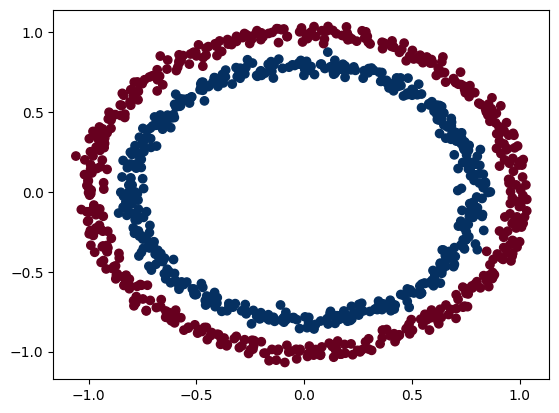

In [119]:
import matplotlib.pyplot as plt

plt.scatter(x[: ,0],x[: ,1],c=y,cmap=plt.cm.RdBu)

In [120]:
# checking input labels and output labels

x.shape , y.shape


((1000, 2), (1000,))

In [121]:
# turning the numpy to tensors
import tensorflow as tf

#x=tf.cast(tf.constant(x),dtype=tf.float32)
#y=tf.cast(tf.constant(y),dtype=tf.float32)

In [122]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2 , random_state=42)


x_train= tf.cast(tf.constant(x_train),dtype=tf.float32)
y_train= tf.cast(tf.constant(y_train),dtype=tf.float32)
x_test=tf.cast(tf.constant(x_test),dtype=tf.float32)
y_test=tf.cast(tf.constant(y_test),dtype=tf.float32)

In [123]:
# lets create the model
tf.random.set_seed(42)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),

])

model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history=model1.fit(x_train,y_train,epochs=200,verbose=0)


In [124]:
model1.evaluate(x_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 4.2601 - accuracy: 0.4950


[4.260124206542969, 0.4950000047683716]

In [125]:
#adding more layer to improve
tf.random.set_seed(42)

model2  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model2.fit(x_train,y_train,epochs=100,verbose=0)

In [126]:
model2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936244964599609, 0.5]

In [127]:
import numpy as np

In [128]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [129]:
def decision_boundary( model , X , y):
  x_min,x_max = x[:,0].min()-0.1 , x[:,0].max()+0.1
  y_min,y_max = x[:,-1].min()-0.1 , x[:,-1].max()+0.1

  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))

  x_in= np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if(len(y_pred[0])>1):
    print("we are doing multiclass calssification :")
    y_pred= np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("we are doing Binary classificaiton :")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())






313/313 [==============================] - 1s 1ms/step
we are doing Binary classificaiton :


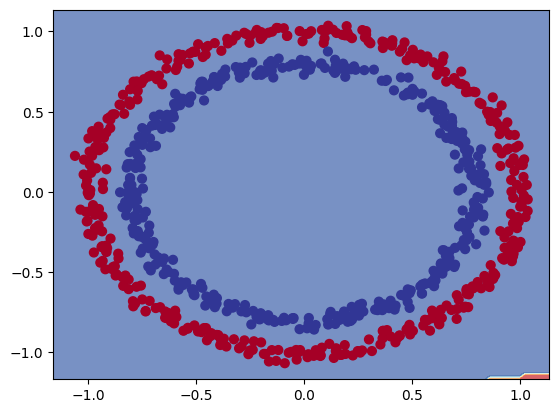

In [130]:
decision_boundary(model2,x_train,y_train)

In [131]:
# training the model for the previous model for regression

tf.random.set_seed(42)


x_reg= tf.range(100,1000,2)
y_reg=tf.add(x_reg,10)

In [132]:
# train test split

x_reg_train= x_reg[:-50]
y_reg_train= y_reg[:-50]
x_reg_test= x_reg[-50:]
y_reg_test= y_reg[-50:]

In [133]:
# creating a new model
tf.random.set_seed(42)

model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(x_reg_train , axis=-1),y_reg_train,epochs=100 , verbose=0)

In [134]:
y_reg_pred= model_3.predict(tf.expand_dims(x_reg_test,axis=-1))

2/2 [==============================] - 0s 7ms/step


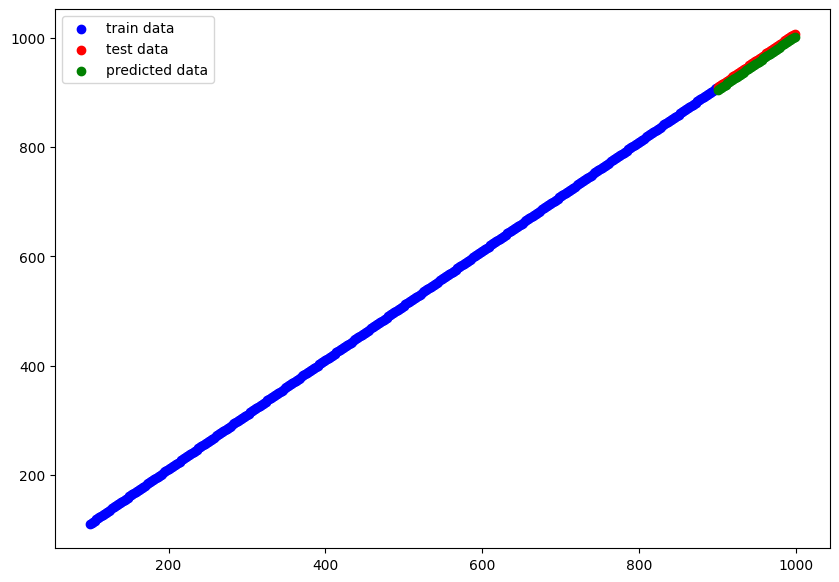

In [135]:
plt.figure(figsize=(10,7))


plt.scatter(x_reg_train,y_reg_train,c='b',label="train data")
plt.scatter(x_reg_test,y_reg_test,c='r',label="test data")
plt.scatter(x_reg_test,y_reg_pred,c='g',label="predicted data")

plt.legend()

In [136]:
# creating a model form tensorflow playground

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history=model_4.fit(x_train , y_train, epochs=100)


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 6.0904 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 6.0870 - accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 6.0730 - accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 6.0703 - accuracy: 0.4913
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 6.0604 - accuracy: 0.4900
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 5.9945 - accuracy: 0.4925
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 5.9746 - accuracy: 0.4925
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 5.9721 - accuracy: 0.4925
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 5.9702 - accuracy: 0.4925
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 5.9686 - accuracy: 0.4925
Epoch 11/

In [137]:
#model_5 from tensorflow playground

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history =model_5.fit(x_train,y_train,epochs=500,verbose=0)


In [138]:
model_5.evaluate(x_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9200


[0.1791706085205078, 0.9200000166893005]

313/313 [==============================] - 1s 1ms/step
we are doing Binary classificaiton :


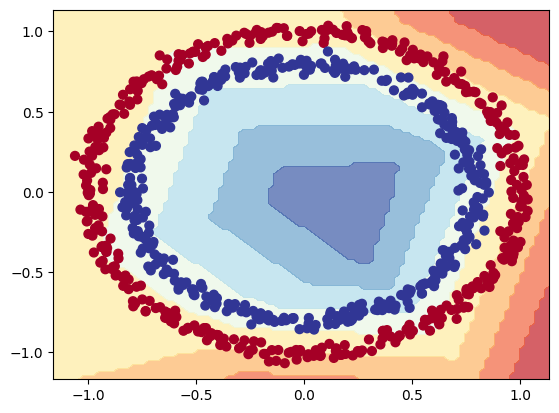

In [139]:
decision_boundary(model_5 , x_train ,y_train)

In [140]:
from keras.api._v2.keras.losses import Loss
# model 6
tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history=model_6.fit(x_train,y_train , epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 4ms/step - loss: 0.7013 - accuracy: 0.4913
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4812
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4787
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4737
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4638
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4650
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4563
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4888
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4950
Epoch 11/

In [141]:
model_6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8550


[0.4395700693130493, 0.8550000190734863]

313/313 [==============================] - 0s 1ms/step
we are doing Binary classificaiton :


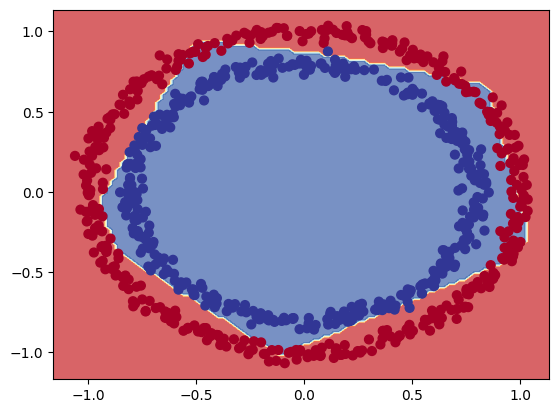

In [142]:
decision_boundary(model_6,x_train,y_train)

In [143]:
# non linear function sigmoid

data = tf.cast(tf.range(-10,10),dtype=tf.float32)
data

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

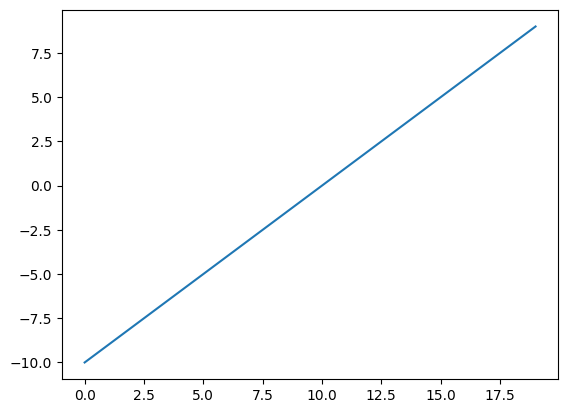

In [144]:
plt.plot(data)

In [145]:
# sigmoid function   sigmoid(x)  = 1/(1 + exp(-x))

def sigmoid(x):
  return 1/(1+ tf.exp(-x))


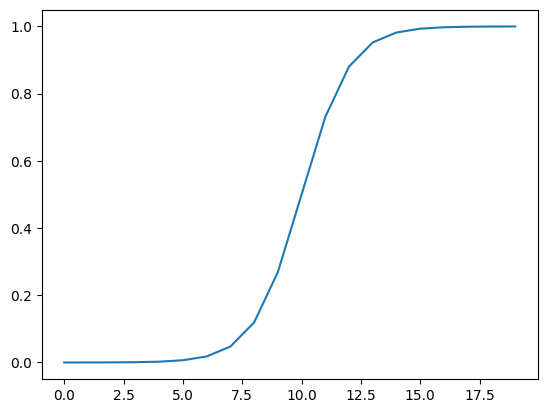

In [146]:
plt.plot(sigmoid(data))

In [147]:
# relu function  relu(x) = max(x,0)
import math

def relu(x):
  return tf.maximum(x,0)



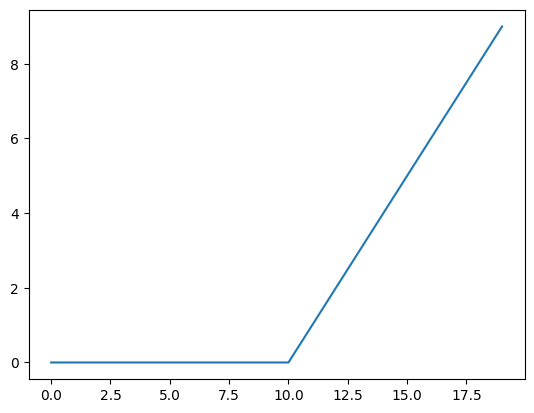

In [148]:
plt.plot(relu(data))

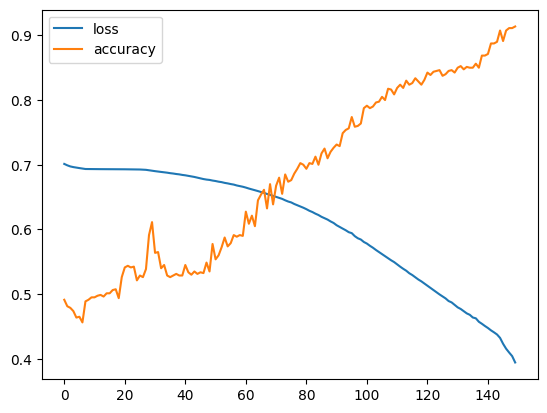

In [149]:
# modek_6 loss and accuracy plot

plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'] , label="accuracy")

plt.legend()

In [150]:
## creating an callback for learning rate


model_7 =tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


lr_shedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_7 = model_7.fit(x_train , y_train , epochs=100 , callbacks=[lr_shedular])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

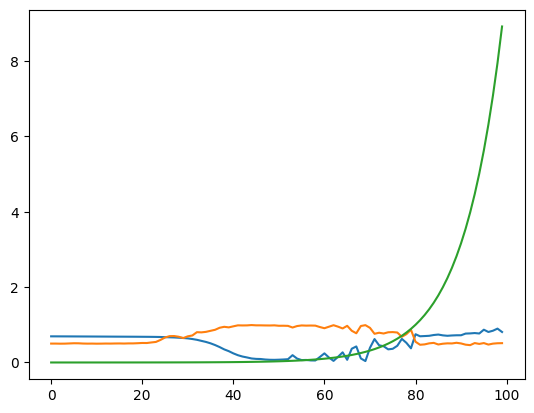

In [151]:
plt.plot(history_7.history['loss'] , label="Loss")
plt.plot(history_7.history['accuracy'],label="accuracy")
plt.plot(history_7.history['lr'],label="Learning rate")


Text(0, 0.5, 'learning rate')

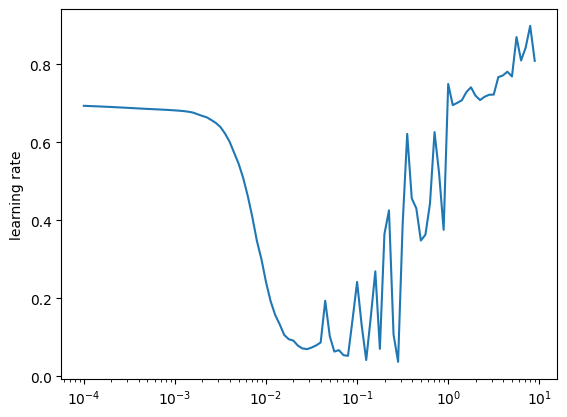

In [152]:
plt.semilogx(history_7.history["lr"],history_7.history["loss"])
plt.ylabel("loss")
plt.ylabel("learning rate")

In [153]:
# training model with the best learning rate

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)

model_8.fit(x_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6957 - accuracy: 0.5050
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5350
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6275
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6425
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7525
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7750
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8012
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8700
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8775
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8988
Epoch 11/25
25/25 [

In [154]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9600


[0.13955001533031464, 0.9599999785423279]

313/313 [==============================] - 1s 2ms/step
we are doing Binary classificaiton :
313/313 [==============================] - 1s 2ms/step
we are doing Binary classificaiton :


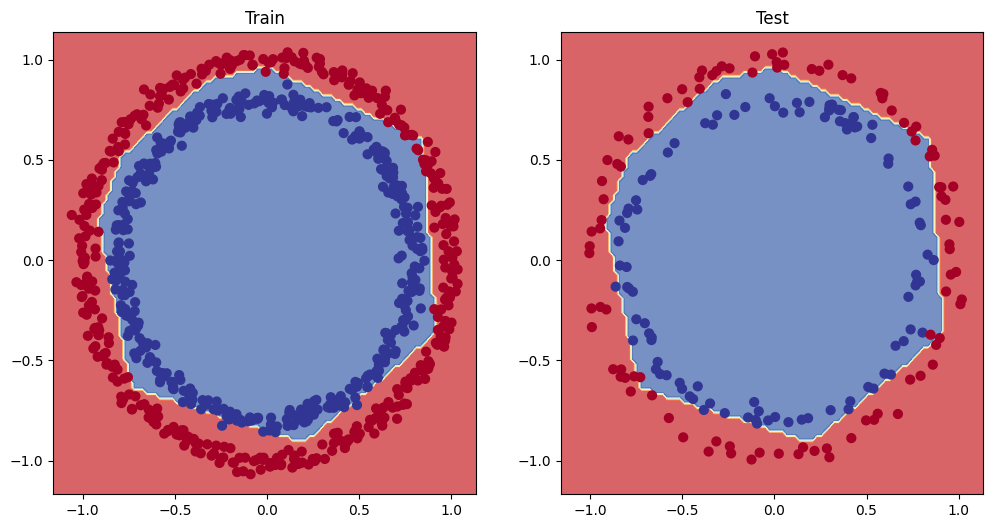

In [155]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
decision_boundary(model_8,x_test,y_test)

7/7 [==============================] - 0s 2ms/step


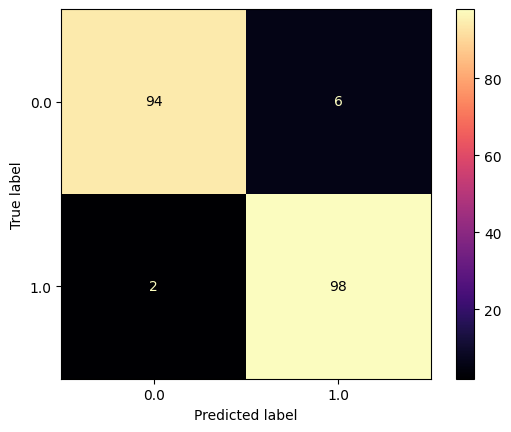

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred= model_8.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test , tf.round(y_pred) , cmap='magma')

## Multiclass Classification

In [157]:
from tensorflow.keras.datasets import fashion_mnist


In [158]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [159]:
(x_train.shape , y_train.shape),(x_test.shape , y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

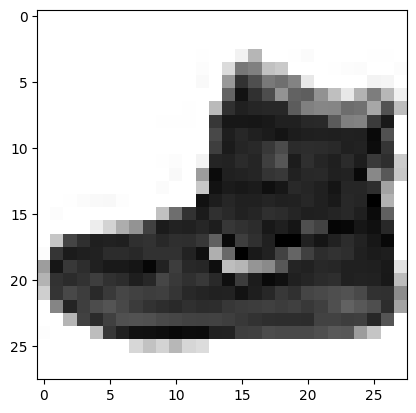

In [160]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [161]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

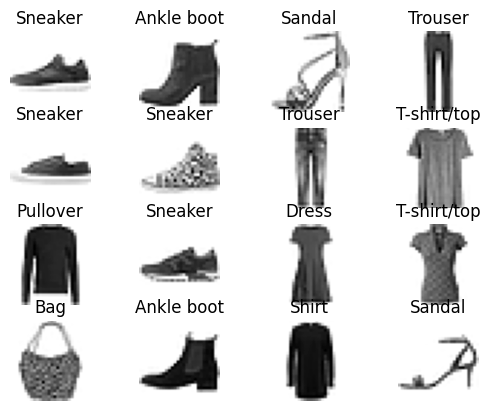

In [162]:
import random

for i in range(16):
  plt.subplot(4,4,i+1),
  a = random.choice(range(len(x_train)))
  plt.title(labels[y_train[a]])
  plt.imshow(x_train[a] , cmap=plt.cm.binary)
  plt.axis(False)

In [163]:
x_train.shape

(60000, 28, 28)

In [164]:
# build a model to identify fashionmnist dataset

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_9.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_history=model_9.fit(x_train,y_train , epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3271 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [165]:
#normalizing the data

(x_train , x_test ) = (x_train/255.0 ,  x_test/255.0 )

In [168]:
# model 10 passing it with normalization

model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

moel_10_history = model_10.fit(x_train,y_train , epochs=10 , validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2444 - accuracy: 0.5617 - val_loss: 0.9789 - val_accuracy: 0.6364
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8769 - accuracy: 0.6653 - val_loss: 0.8566 - val_accuracy: 0.6661
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7859 - accuracy: 0.6862 - val_loss: 0.7934 - val_accuracy: 0.6879
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7487 - accuracy: 0.7002 - val_loss: 0.7702 - val_accuracy: 0.7017
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7306 - accuracy: 0.7074 - val_loss: 0.7769 - val_accuracy: 0.6921
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7175 - accuracy: 0.7218 - val_loss: 0.7805 - val_accuracy: 0.7131
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6774 - accuracy: 0.7611 - val_loss: 0.7058 - val_accuracy:

In [171]:
model_10_history = moel_10_history

Text(0.5, 1.0, 'x_test normalized')

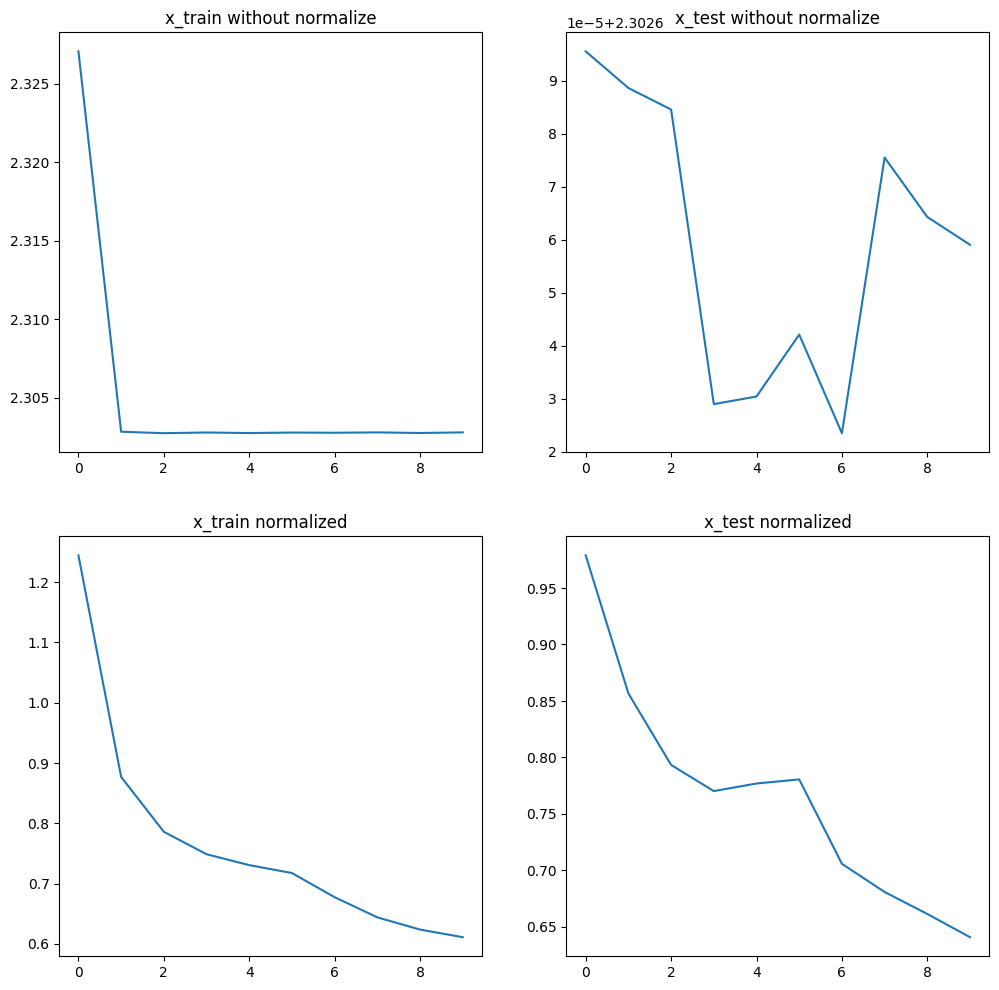

In [182]:
plt.figure(figsize=(12,12))
plt.subplot(2,2 ,1 )
plt.plot( non_norm_history.history['loss'])
plt.title("x_train without normalize")
plt.subplot(2,2,2)
plt.plot(non_norm_history.history['val_loss'])
plt.title("x_test without normalize")
plt.subplot(2,2,3)
plt.plot(model_10_history.history['loss'])
plt.title("x_train normalized")
plt.subplot(2,2,4)
plt.plot(model_10_history.history['val_loss'])
plt.title("x_test normalized")

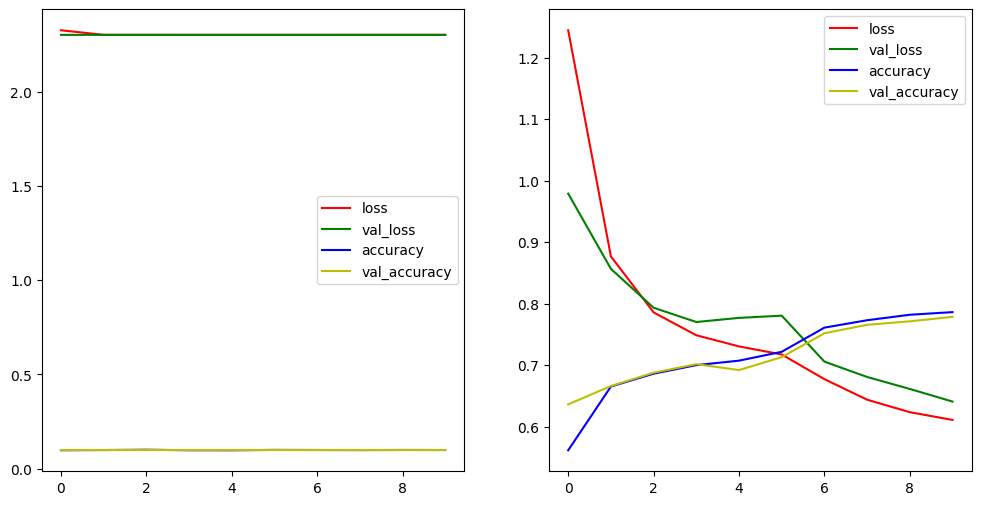

In [188]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(non_norm_history.history['loss'],c='r',label='loss')
plt.plot(non_norm_history.history['val_loss'],c='g',label="val_loss")
plt.plot(non_norm_history.history['accuracy'],c='b',label="accuracy")
plt.plot(non_norm_history.history['val_accuracy'],c='y',label="val_accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(model_10_history.history['loss'],c='r',label='loss')
plt.plot(model_10_history.history['val_loss'],c='g',label="val_loss")
plt.plot(model_10_history.history['accuracy'],c='b',label="accuracy")
plt.plot(model_10_history.history['val_accuracy'],c='y',label="val_accuracy")
plt.legend()


In [195]:
#ideal learning rate

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_shedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_11_history=model_11.fit(x_train,y_train,epochs=40, validation_data=(x_test,y_test),callbacks=[lr_shedular])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8834 - accuracy: 0.3056 - val_loss: 1.5543 - val_accuracy: 0.4279 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4095 - accuracy: 0.4854 - val_loss: 1.3121 - val_accuracy: 0.5682 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2190 - accuracy: 0.6063 - val_loss: 1.1481 - val_accuracy: 0.6414 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0663 - accuracy: 0.6629 - val_loss: 1.0198 - val_accuracy: 0.6695 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9606 - accuracy: 0.6823 - val_loss: 0.9360 - val_accuracy: 0.6857 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8882 - accuracy: 0.6981 - val_loss: 0.8790 - val_accuracy: 0.6938 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

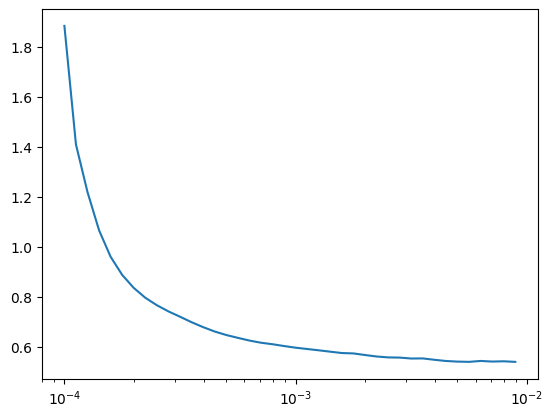

In [197]:
plt.semilogx(model_11_history.history["lr"],model_11_history.history['loss'])

In [198]:
y_pred= model_10.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [205]:
y_pred_mod=tf.argmax(y_pred,axis=1)

ValueError: ignored

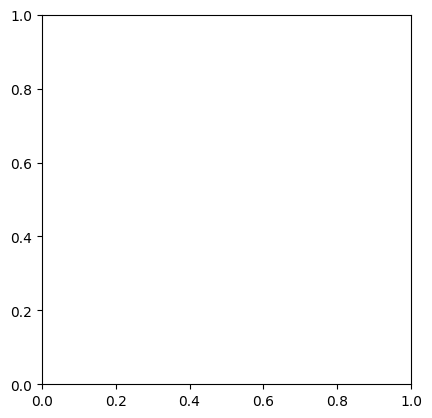

In [210]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mod ,cmap="magma" )